# 7章　線形回帰

# ここで学習した事柄(numpy関連含む)
### 配列のスライス指定(要素を飛ばして指定する記法）
### np.hstack（配列の要素を横に結合する）
### np.vstack(配列の要素を縦に結合する)
### np.insert(２次元配列に列を挿入する)
### np.ravel(行列を平坦化)
### numpyブロードキャストを利用した配列インデクスの指定(numpyのブロードキャスト機能で、配列feature_namesで 'RM'に一致するインデックスを返す。のコメントの所)

In [1]:
# 必要ライブラリの宣言
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# waring抑止
import warnings
warnings.filterwarnings('ignore')

/home/a/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
# 「ボストン・データセット」はscikit-learnのライブラリでも取得できるが、
# その場合、将来版で利用できなくなる予定のため、別Webサイトから取得する
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", 
    skiprows=22, header=None)
x_org = np.hstack([raw_df.values[::2, :], 
    raw_df.values[1::2, :2]])
yt = raw_df.values[1::2, 2]
feature_names = np.array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX',
    'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO','B', 'LSTAT'])

print('元データ', x_org.shape, yt.shape)
print('項目名: ', feature_names)

# データ絞り込み (項目 RMのみ)
x_data = x_org[:,feature_names == 'RM'] #numpyのブロードキャスト機能で、配列feature_namesで 'RM'に一致するインデックスを返す。
print('絞り込み後', x_data.shape)

# ダミー変数を追加 #https://note.nkmk.me/python-numpy-insert/
x = np.insert(x_data, 0, 1.0, axis=1) #x_dataの第0列(第２引数で指定)に、1.0を挿入(axis=1で列を指定する)
print('ダミー変数追加後', x.shape)

元データ (506, 13) (506,)
項目名:  ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
絞り込み後 (506, 1)
ダミー変数追加後 (506, 2)


In [3]:
#added by miyakz
print("生のraw_df")
print(raw_df)

print("生のraw_df.values")
print(raw_df.values)

print(str(raw_df.values.__class__.__name__))

print("これは何をしているのか？→raw_df.values[::2, :]")
#以下を参照
#https://github.com/miyakz1192/deep-learning-from-scratch/blob/master/my_jupyter/numpy_excersice.ipynb
#ここの「要素アクセス」の所を参照
#第一引数（データの系列方向）：1次元目と2次元目は任意。最後の2指定は"1つ"飛ばし。
#第２引数（データの要素方向）：すべて（任意）
print(raw_df.values[::2, :])
print(raw_df.values.shape)

#試しに色々と操作してみる。
print("======================")
#以下は、第２データ目から第２データ目（要するに第２データ目のみ）を選択。１つ飛ばしとしているが、データ要素が１つなので効果なし。
print(raw_df.values[1:2:2, :])
print("======================")
#以下は、上記に加えて、データの要素の第２番めを選択
print(raw_df.values[1:2:2, 2])
print("======================")
#以下は、上記に加えて、データ要素の第２要素から第３要素まで選択。
print(raw_df.values[1:2:2, 2:4])

#更に、raw_df.values[1::2, :2]は何をしているか？
print("これは何をしているか？→raw_df.values[1::2, :2] ???")
print(raw_df.values[1::2, :2])

生のraw_df
             0      1      2    3      4      5     6       7    8      9   \
0       0.00632  18.00   2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1     396.90000   4.98  24.00  NaN    NaN    NaN   NaN     NaN  NaN    NaN   
2       0.02731   0.00   7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
3     396.90000   9.14  21.60  NaN    NaN    NaN   NaN     NaN  NaN    NaN   
4       0.02729   0.00   7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
...         ...    ...    ...  ...    ...    ...   ...     ...  ...    ...   
1007  396.90000   5.64  23.90  NaN    NaN    NaN   NaN     NaN  NaN    NaN   
1008    0.10959   0.00  11.93  0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
1009  393.45000   6.48  22.00  NaN    NaN    NaN   NaN     NaN  NaN    NaN   
1010    0.04741   0.00  11.93  0.0  0.573  6.030  80.8  2.5050  1.0  273.0   
1011  396.90000   7.88  11.90  NaN    NaN    NaN   NaN     NaN  NaN    NaN   

        10  
0     15.3  
1      NaN  
2     17.8  
3 

added by miyakz

## np.hstackは何をしているのか？

配列を横方向に結合させるためのメソッドとのこと
https://kino-code.com/python-numpy-hstack/

冒頭の以下のコードは
~~~
x_org = np.hstack([raw_df.values[::2, :], 
    raw_df.values[1::2, :2]])
~~~
    
生データのN行目とN+1行目を結合させていることがわかる。raw_df.values[1::2, :2]にて、第２引数に:2を指定することで、
NaNを除いた有効なデータを結合している

## ちなみに正解値のデータ(住宅価格に関する説明）だが、@ITの以下の記事が詳しい。

https://atmarkit.itmedia.co.jp/ait/articles/2006/24/news033.html

データにある以下をgoogle翻訳すると
MEDV     Median value of owner-occupied homes in $1000's

「1,000 ドル台の持ち家住宅の中央値」となって意味不明だが

@ITの解説では

「MEDV：「住宅価格」（1000ドル単位）の中央値。通常はこの数値が目的変数として使われる」となって意味が通じる。

$1000'sは$1000単位と訳してくれればわかりやすいのだけども。。。

In [4]:
# 入力データxの表示 (ダミー変数を含む)
print(x.shape)
print(x[:5,:])

(506, 2)
[[1.    6.575]
 [1.    6.421]
 [1.    7.185]
 [1.    6.998]
 [1.    7.147]]


In [5]:
# 正解データ yの表示
print(yt[:5])

[24.  21.6 34.7 33.4 36.2]


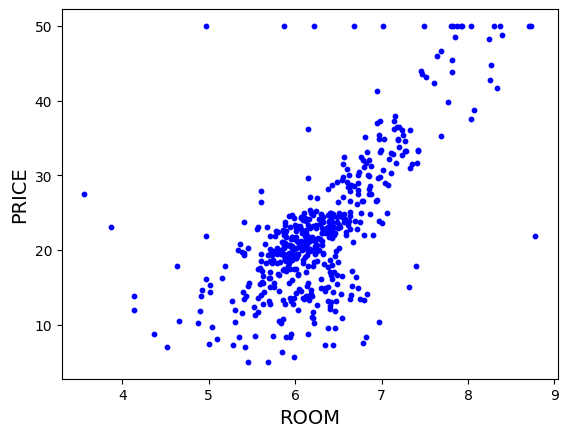

In [6]:
# 散布図の表示
plt.scatter(x[:,1], yt, s=10, c='b')
plt.xlabel('ROOM', fontsize=14)
plt.ylabel('PRICE', fontsize=14)
plt.show()

In [7]:
# 予測関数 (1, x)の値から予測値ypを計算する
def pred(x, w):
    return(x @ w)

In [8]:
# 初期化処理

# データ系列総数
M  = x.shape[0]

# 入力データ次元数(ダミー変数を含む)
D = x.shape[1]

# 繰り返し回数
iters = 50000

# 学習率
alpha = 0.01

# 重みベクトルの初期値 (すべての値を1にする)
w = np.ones(D)

# 評価結果記録用 (損失関数値のみ記録)
history = np.zeros((0,2)) #要素数が０（空）の２次元配列を作る(0行２列の行列を作る)

In [9]:
#addedby miyakz
print(history)
print(history.shape)

[]
(0, 2)


In [10]:
# 繰り返しループ
for k in range(iters):
    
    # 予測値の計算 (7.8.1)
    yp = pred(x, w)
    
    # 誤差の計算 (7.8.2)
    yd = yp - yt
    
    # 勾配降下法の実装 (7.8.4)
    w = w - alpha * (x.T @ yd) / M
    
    # 学習曲線描画用データの計算、保存
    if ( k % 100 == 0):
        # 損失関数値の計算 (7.6.1)
        loss = np.mean(yd ** 2) / 2
        # 計算結果の記録
        history = np.vstack((history, np.array([k, loss])))
        # 画面表示
        print( "iter = %d  loss = %f" % (k, loss))    

iter = 0  loss = 154.224934
iter = 100  loss = 29.617518
iter = 200  loss = 29.431766
iter = 300  loss = 29.250428
iter = 400  loss = 29.073399
iter = 500  loss = 28.900577
iter = 600  loss = 28.731861
iter = 700  loss = 28.567154
iter = 800  loss = 28.406360
iter = 900  loss = 28.249388
iter = 1000  loss = 28.096145
iter = 1100  loss = 27.946544
iter = 1200  loss = 27.800498
iter = 1300  loss = 27.657922
iter = 1400  loss = 27.518733
iter = 1500  loss = 27.382852
iter = 1600  loss = 27.250200
iter = 1700  loss = 27.120700
iter = 1800  loss = 26.994277
iter = 1900  loss = 26.870858
iter = 2000  loss = 26.750372
iter = 2100  loss = 26.632749
iter = 2200  loss = 26.517921
iter = 2300  loss = 26.405821
iter = 2400  loss = 26.296385
iter = 2500  loss = 26.189549
iter = 2600  loss = 26.085252
iter = 2700  loss = 25.983433
iter = 2800  loss = 25.884034
iter = 2900  loss = 25.786997
iter = 3000  loss = 25.692265
iter = 3100  loss = 25.599784
iter = 3200  loss = 25.509501
iter = 3300  loss = 2

iter = 28600  loss = 21.808526
iter = 28700  loss = 21.808330
iter = 28800  loss = 21.808138
iter = 28900  loss = 21.807952
iter = 29000  loss = 21.807769
iter = 29100  loss = 21.807591
iter = 29200  loss = 21.807417
iter = 29300  loss = 21.807248
iter = 29400  loss = 21.807082
iter = 29500  loss = 21.806920
iter = 29600  loss = 21.806762
iter = 29700  loss = 21.806608
iter = 29800  loss = 21.806458
iter = 29900  loss = 21.806311
iter = 30000  loss = 21.806168
iter = 30100  loss = 21.806028
iter = 30200  loss = 21.805891
iter = 30300  loss = 21.805757
iter = 30400  loss = 21.805627
iter = 30500  loss = 21.805500
iter = 30600  loss = 21.805376
iter = 30700  loss = 21.805255
iter = 30800  loss = 21.805136
iter = 30900  loss = 21.805021
iter = 31000  loss = 21.804908
iter = 31100  loss = 21.804798
iter = 31200  loss = 21.804691
iter = 31300  loss = 21.804586
iter = 31400  loss = 21.804483
iter = 31500  loss = 21.804383
iter = 31600  loss = 21.804286
iter = 31700  loss = 21.804190
iter = 3

In [11]:
# 最終的な損失関数初期値、最終値
print('損失関数初期値: %f' % history[0,1])
print('損失関数最終値: %f' % history[-1,1])

損失関数初期値: 154.224934
損失関数最終値: 21.800325


In [12]:
# 下記直線描画用の座標値計算
xall = x[:,1].ravel() 
#ravelメソッドの詳細は以下を参照。複数次元配列を１次元配列に平坦化する。ravelは可能な限りビューを返し、flattenはコピーを返すという違いがあるらしい。
#https://note.nkmk.me/python-numpy-ravel-flatten/
#なお、ビューとコピーの違いは以下。
#https://note.nkmk.me/python-pandas-view-copy/
xl = np.array([[1, xall.min()],[1, xall.max()]])
yl = pred(xl, w)

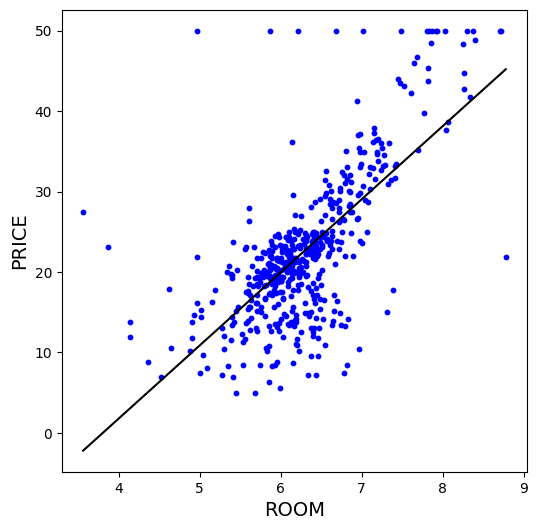

In [13]:
# 散布図と回帰直線の描画
plt.figure(figsize=(6,6))
plt.scatter(x[:,1], yt, s=10, c='b')
plt.xlabel('ROOM', fontsize=14)
plt.ylabel('PRICE', fontsize=14)
plt.plot(xl[:,1], yl, c='k')
plt.show()

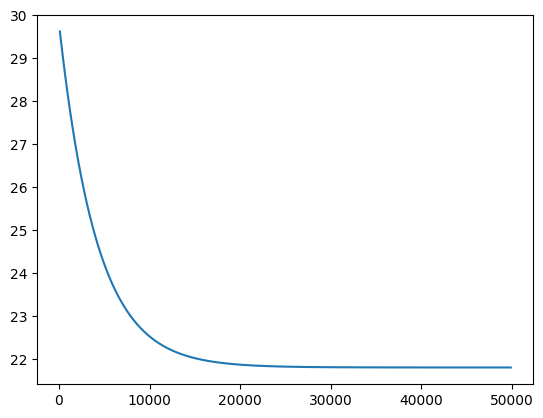

In [14]:
# 学習曲線の表示 (最初の1個分を除く)
plt.plot(history[1:,0], history[1:,1])
plt.show()

## 7.10  重回帰モデルへの拡張

In [15]:
# 列(LSTAT: 低所得者率)の追加
x_add = x_org[:,feature_names == 'LSTAT']
x2 = np.hstack((x, x_add))
print(x2.shape)

(506, 3)


In [16]:
# 入力データxの表示 (ダミーデータを含む)
print(x2[:5,:])

[[1.    6.575 4.98 ]
 [1.    6.421 9.14 ]
 [1.    7.185 4.03 ]
 [1.    6.998 2.94 ]
 [1.    7.147 5.33 ]]


In [17]:
# 初期化処理

# データ系列総数
M  = x2.shape[0]

# 入力データ次元数(ダミー変数を含む)
D = x2.shape[1]

# 繰り返し回数
iters = 50000

# 学習率
alpha = 0.01

# 重みベクトルの初期値 (すべての値を1にする)
w = np.ones(D)

# 評価結果記録用 (損失関数値のみ記録)
history = np.zeros((0,2))

In [18]:
# 繰り返しループ
for k in range(iters):
    
    # 予測値の計算 (7.8.1)
    yp = pred(x2, w)
    
    # 誤差の計算 (7.8.2)
    yd = yp - yt
    
    # 勾配降下法の実装 (7.8.4)
    w = w - alpha * (x2.T @ yd) / M
    
    # 学習曲線描画用データの計算、保存
    if ( k % 100 == 0):
        # 損失関数値の計算 (7.6.1)
        loss = np.mean(yd ** 2) / 2
        # 計算結果の記録
        history = np.vstack((history, np.array([k, loss])))
        # 画面表示
        print( "iter = %d  loss = %f" % (k, loss))    

iter = 0  loss = 112.063982
iter = 100  loss = 3753823486849654538960539484160.000000
iter = 200  loss = 2655334090092048840304997303457399619333641481694889411346432.000000
iter = 300  loss = 1878297995285389845771871419740313448531353246802527452461280621621659241714209067974524928.000000
iter = 400  loss = 1328647635059328515131961917958233260010110874734494815182181913568993750919607000530712562926733207758140202205197631488.000000
iter = 500  loss = 939842635502848959802051905083333893189693285496059755389148058019690357736842983091667264575645792135994156419976659397682157829724819024732452028416.000000
iter = 600  loss = 664814474659043143721802884115979632987110146028734825208170044266817116202120531605157962210827793933144596617956699525450809534261818804738123510745485935010887781352757771894784.000000
iter = 700  loss = 4702683928354687184978187890654866672969122171181106574526728253801155702466042964976465215954654704241742146146156203615235119947571438894045866602442630883

iter = 41300  loss = nan
iter = 41400  loss = nan
iter = 41500  loss = nan
iter = 41600  loss = nan
iter = 41700  loss = nan
iter = 41800  loss = nan
iter = 41900  loss = nan
iter = 42000  loss = nan
iter = 42100  loss = nan
iter = 42200  loss = nan
iter = 42300  loss = nan
iter = 42400  loss = nan
iter = 42500  loss = nan
iter = 42600  loss = nan
iter = 42700  loss = nan
iter = 42800  loss = nan
iter = 42900  loss = nan
iter = 43000  loss = nan
iter = 43100  loss = nan
iter = 43200  loss = nan
iter = 43300  loss = nan
iter = 43400  loss = nan
iter = 43500  loss = nan
iter = 43600  loss = nan
iter = 43700  loss = nan
iter = 43800  loss = nan
iter = 43900  loss = nan
iter = 44000  loss = nan
iter = 44100  loss = nan
iter = 44200  loss = nan
iter = 44300  loss = nan
iter = 44400  loss = nan
iter = 44500  loss = nan
iter = 44600  loss = nan
iter = 44700  loss = nan
iter = 44800  loss = nan
iter = 44900  loss = nan
iter = 45000  loss = nan
iter = 45100  loss = nan
iter = 45200  loss = nan


In [19]:
# 初期化処理 (パラメータを適切な値に変更)

# データ系列総数
M  = x2.shape[0]

# 入力データ次元数(ダミー変数を含む)
D = x2.shape[1]

# 繰り返し回数
#iters = 50000
iters = 2000

# 学習率
#alpha = 0.01
alpha = 0.001

# 重みベクトルの初期値 (すべての値を1にする)
w = np.ones(D)

# 評価結果記録用 (損失関数値のみ記録)
history = np.zeros((0,2))

In [20]:
# 繰り返しループ
for k in range(iters):
    
    # 予測値の計算 (7.8.1)
    yp = pred(x2, w)
    
    # 誤差の計算 (7.8.2)
    yd = yp - yt
    
    # 勾配降下法の実装 (7.8.4)
    w = w - alpha * (x2.T @ yd) / M
    
    # 学習曲線描画用データの計算、保存
    if ( k % 100 == 0):
        # 損失関数値の計算 (7.6.1)
        loss = np.mean(yd ** 2) / 2
        # 計算結果の記録
        history = np.vstack((history, np.array([k, loss])))
        # 画面表示
        print( "iter = %d  loss = %f" % (k, loss))    

iter = 0  loss = 112.063982
iter = 100  loss = 25.358934
iter = 200  loss = 16.391055
iter = 300  loss = 15.403015
iter = 400  loss = 15.294135
iter = 500  loss = 15.282114
iter = 600  loss = 15.280764
iter = 700  loss = 15.280589
iter = 800  loss = 15.280544
iter = 900  loss = 15.280514
iter = 1000  loss = 15.280485
iter = 1100  loss = 15.280456
iter = 1200  loss = 15.280428
iter = 1300  loss = 15.280399
iter = 1400  loss = 15.280371
iter = 1500  loss = 15.280342
iter = 1600  loss = 15.280314
iter = 1700  loss = 15.280285
iter = 1800  loss = 15.280257
iter = 1900  loss = 15.280228


In [21]:
# 最終的な損失関数初期値、最終値
print('損失関数初期値: %f' % history[0,1])
print('損失関数最終値: %f' % history[-1,1])

損失関数初期値: 112.063982
損失関数最終値: 15.280228


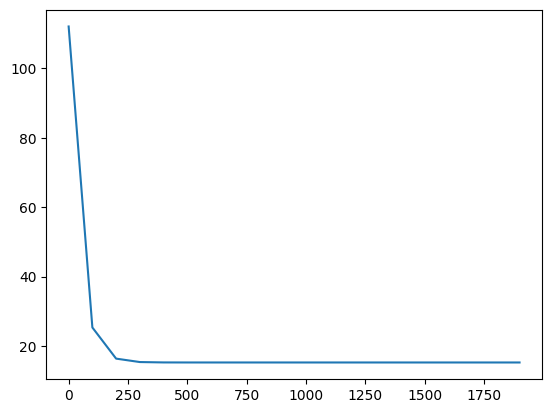

In [22]:
# 学習曲線の表示 (最初の10個分を除く)
plt.plot(history[:,0], history[:,1])
plt.show()